In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import scipy.spatial.distance as dist
from sklearn import metrics 

In [3]:
crime=pd.read_csv("D:\\zexcelR\\DS Assignments\\Assignment7\\crime_data.csv")

In [4]:
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


<AxesSubplot:xlabel='X', ylabel='Y'>

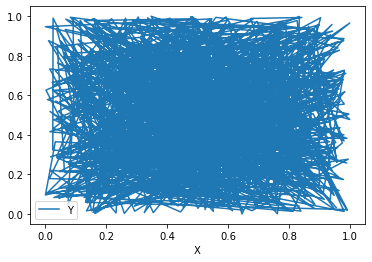

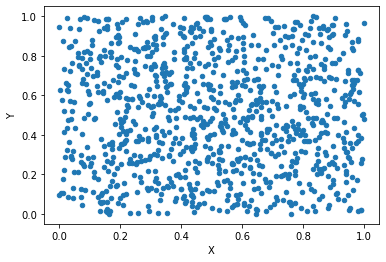

In [8]:
X=np.random.uniform(0,1,1000)
Y=np.random.uniform(0,1,1000)
df_xy=pd.DataFrame(columns=['X','Y'])
df_xy.X=X
df_xy.Y=Y
df_xy.plot(x='X',y='Y')
df_xy.plot(x='X',y='Y',kind='scatter')

In [11]:
#Normalization function
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [12]:
#Normalize DataFrame(considering Numerical part of Data)
df_norm=norm_func(crime.iloc[:,1:])

In [14]:
df_norm.head(10)

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


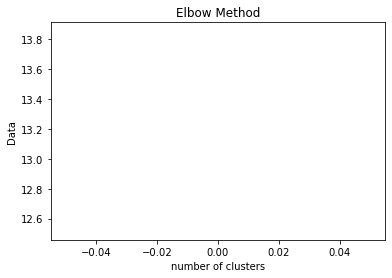

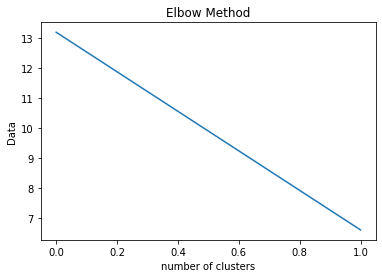

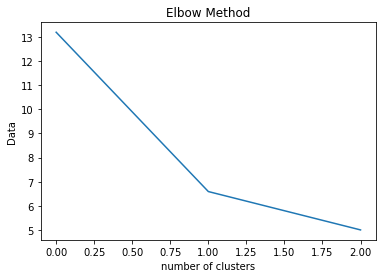

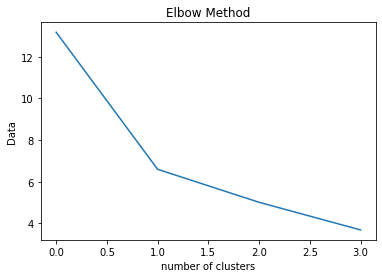

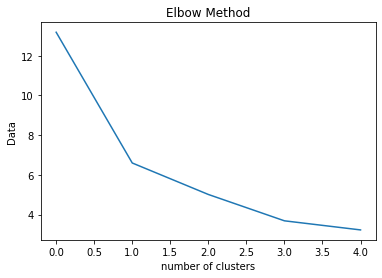

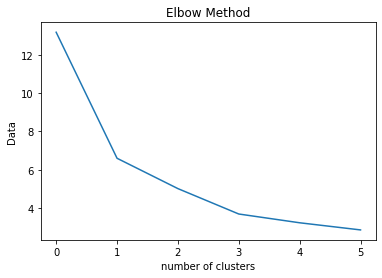

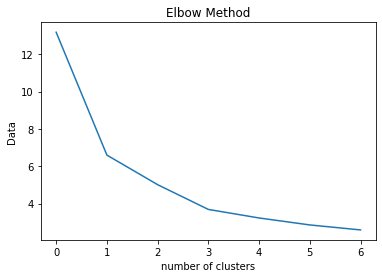

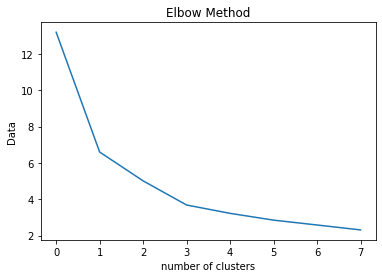

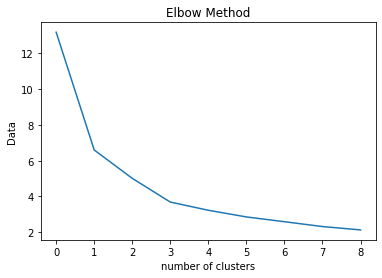

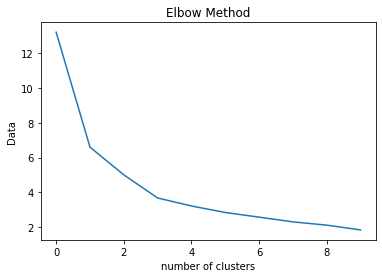

In [28]:
data=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit_transform(df_norm)
    data.append(kmeans.inertia_)
    plt.plot(data)
    plt.title('Elbow Method')
    plt.xlabel('number of clusters')
    plt.ylabel('Data')
    plt.show()

In [30]:
#selecting the optimum number of clusters as 3
model=KMeans(n_clusters=3)
#fit normalized data
model.fit(df_norm)

KMeans(n_clusters=3)

In [32]:
#converting numpy array to pandas series object
md=pd.Series(model.labels_)
#creating new column & assigning it to new model
crime['clust']=md

In [33]:
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,2
7,Delaware,5.9,238,72,15.8,2
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,1


In [34]:
#calculate silhouette score or silhouette coefficient to check cluster optimacy
silhouetteK=metrics.silhouette_score(df_norm,model.labels_,metric='euclidean')

In [35]:
silhouetteK

0.3187755079997931

In [39]:
crime.iloc[:,1:6:].groupby(crime.clust).mean()

,Murder,Assault,UrbanPop,Rape,clust
clust,,,,,
0,3.600000,78.538462,52.076923,12.176923,0.0
1,12.331579,259.315789,68.315789,29.215789,1.0
2,6.016667,143.888889,72.333333,19.344444,2.0


In [40]:
crime.head(10)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,2
7,Delaware,5.9,238,72,15.8,2
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,1
